#Title

**Group 4 members:** Emily Bartman, Alex Schmig, and Joseph Shepherd

**Date:** 11/12/2023

**Assignment:** Final Project - Data Science Tasks (Part 2)

**Class:** FA23-BL-DSCI-D590-1078

**Project Title:** Movie Rating Predictor Application

#Exploratory Data Analysis (EDA)

##Cleanup and Reasoning

In [67]:
import pandas as pd
import numpy as np
d=pd.read_csv("C:/Users/josep/Documents/IU/InProgressCourses/AppliedDS/Final Project/ADS_Group4_Final_Project_Repo/imdb_top_1000.csv")
d.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [68]:
d.corr().IMDB_Rating

C:\Users\josep\AppData\Local\Temp\ipykernel_21648\1568888106.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  d.corr().IMDB_Rating


IMDB_Rating    1.000000
Meta_score     0.268531
No_of_Votes    0.494979
Name: IMDB_Rating, dtype: float64

This shows that some numeric veriables like Release_Year and Runtime are not numeric data types.

In [69]:
d["IMDB_Rating"].value_counts()

7.7    157
7.8    151
8.0    141
8.1    127
7.6    123
7.9    106
8.2     67
8.3     44
8.4     31
8.5     20
8.6     15
8.7      5
8.8      5
8.9      3
9.0      3
9.2      1
9.3      1
Name: IMDB_Rating, dtype: int64

In [70]:
d['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

This shows that one row in the dataset has a categorical value in the numeric field Released_Year, making it the data type "object".

In [71]:
df=d[np.isfinite(pd.to_numeric(d.Released_Year, errors="coerce"))]

This drops the row that does not contain a numerical value in Released_Year.

In [72]:
clean_df = df.copy()

Renamed data slice for future cleaning.

In [73]:
clean_df["Runtime"] = clean_df.Runtime.replace({'min':''},regex=True)

Drop the "min" label from the Runtime variable so we can make it numeric.

In [74]:
clean_df["Gross"] = clean_df.Gross.replace({',':''},regex=True)

Dropped the commas in the Gross variable so that it could be numeric.

In [75]:
clean_df["Genre"] = clean_df.Genre.replace({', ':','},regex=True)

Got rid of the spaces after commas in Genre field so that it is easier to split.

In [76]:
clean_df.Genre.str.split(',').explode('Genre').value_counts()

Drama        723
Comedy       233
Crime        209
Adventure    195
Action       189
Thriller     137
Romance      125
Biography    109
Mystery       99
Animation     82
Sci-Fi        67
Fantasy       66
Family        56
History       55
War           51
Music         35
Horror        32
Western       20
Film-Noir     19
Sport         19
Musical       17
Name: Genre, dtype: int64

Split and counted Genre to understand the backdown of this variable.

In [77]:
new_columns2 = clean_df.Genre.replace({', ':','},regex=True).str.get_dummies(sep=(','))
new_columns2.columns = new_columns2.columns.str.strip()
clean_df = pd.concat([clean_df, new_columns2], axis=1)

Created new columns to show each Genre and count when it is used in a movie.

In [78]:
new_columns4 = clean_df.Star1.str.get_dummies().add_suffix(' Star 1')
new_columns4.columns = new_columns4.columns.str.strip()
clean_df = pd.concat([clean_df, new_columns4], axis=1)

Created new columns to show each Star 1 and count when they are in a movie.

In [79]:
new_columns5 = clean_df.Star2.str.get_dummies().add_suffix(' Star 2')
new_columns5.columns = new_columns5.columns.str.strip()
clean_df = pd.concat([clean_df, new_columns5], axis=1)

Created new columns to show each Star 2 and count when they are in a movie.

In [80]:
new_columns6 = clean_df.Star3.str.get_dummies().add_suffix(' Star 3')
new_columns6.columns = new_columns6.columns.str.strip()
clean_df = pd.concat([clean_df, new_columns6], axis=1)

Created new columns to show each Star 3 and count when they are in a movie.

In [81]:
new_columns7 = clean_df.Star4.str.get_dummies().add_suffix(' Star 4')
new_columns7.columns = new_columns7.columns.str.strip()
clean_df = pd.concat([clean_df, new_columns7], axis=1)

Created new columns to show each Star 4 and count when they are in a movie.

In [82]:
new_columns3 = clean_df.Director.str.get_dummies().add_suffix(' Director')
new_columns3.columns = new_columns3.columns.str.strip()
clean_df = pd.concat([clean_df, new_columns3], axis=1)

Created new columns to show each Director and count when they direct a movie.

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [84]:
d.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [85]:
clean_df.describe()

,IMDB_Rating,Meta_score,No_of_Votes,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,...,Yilmaz Erdogan Director,Yimou Zhang Director,Yoshiaki Kawajiri Director,Yoshifumi Kondô Director,Yôjirô Takita Director,Zack Snyder Director,Zaza Urushadze Director,Zoya Akhtar Director,Çagan Irmak Director,Ömer Faruk Sorak Director
count,999.000000,842.000000,9.990000e+02,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,7.949650,77.972684,2.736974e+05,0.189189,0.195195,0.082082,0.109109,0.233233,0.209209,0.723724,...,0.001001,0.002002,0.002002,0.001001,0.001001,0.002002,0.001001,0.002002,0.001001,0.001001
std,0.275407,12.383410,3.275366e+05,0.391855,0.396549,0.274627,0.311932,0.423101,0.406948,0.447379,...,0.031639,0.044721,0.044721,0.031639,0.031639,0.044721,0.031639,0.044721,0.031639,0.031639
min,7.600000,28.000000,2.508800e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,70.000000,5.547150e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.900000,79.000000,1.383560e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.100000,87.000000,3.744775e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.300000,100.000000,2.343110e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Here you can compare the differences made so far to the dataset.

In [86]:
print(clean_df.dtypes.to_string())

Poster_Link                                   object
Series_Title                                  object
Released_Year                                 object
Certificate                                   object
Runtime                                       object
Genre                                         object
IMDB_Rating                                  float64
Overview                                      object
Meta_score                                   float64
Director                                      object
Star1                                         object
Star2                                         object
Star3                                         object
Star4                                         object
No_of_Votes                                    int64
Gross                                         object
Action                                         int64
Adventure                                      int64
Animation                                     

This shows that Released_Year and Runtime are still object, not numeric.

In [87]:
clean_df['Released_Year']= clean_df['Released_Year'].astype(str).astype(int)

In [88]:
clean_df['Runtime']= clean_df['Runtime'].astype(str).astype(int)

Converted Released_Year and Runtime to numeric variables.

##Missing Data Analysis

In [ ]:
display(d.isna().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

This shows the missing data per category in the original data set.

In [ ]:
clean_df=clean_df.drop(['Certificate','Poster_Link','Gross','No_of_Votes'],axis=1)

After reviewing the data in the columns, we determined that we do not need Certificate, Poster_Link, Gross, nor No_of Votes. Certificate proved to be inaccurately recorded, based on a comparison to IMDB website. Poster_Link provided no additional data to pull from. Gross and No of Votes were variables that came from data collected after the movie release.

In [ ]:
print(clean_df.isna().sum().to_string())

Series_Title                                   0
Released_Year                                  0
Runtime                                        0
Genre                                          0
IMDB_Rating                                    0
Overview                                       0
Meta_score                                   157
Director                                       0
Star1                                          0
Star2                                          0
Star3                                          0
Star4                                          0
Action                                         0
Adventure                                      0
Animation                                      0
Biography                                      0
Comedy                                         0
Crime                                          0
Drama                                          0
Family                                         0
Fantasy             

A check again shows that we are still missing data in Meta_Score after the changes on dropping those columns.

In [ ]:
clean_df.dropna(subset=['Meta_score'], inplace=True)

In [ ]:
clean_df['Meta_score'] = clean_df['Meta_score'].astype(int)

To keep the Meta_Score category, we decided to drop the rows missing the score.

In [ ]:
print(clean_df.isna().sum().to_string())

Series_Title                                 0
Released_Year                                0
Runtime                                      0
Genre                                        0
IMDB_Rating                                  0
Overview                                     0
Meta_score                                   0
Director                                     0
Star1                                        0
Star2                                        0
Star3                                        0
Star4                                        0
Action                                       0
Adventure                                    0
Animation                                    0
Biography                                    0
Comedy                                       0
Crime                                        0
Drama                                        0
Family                                       0
Fantasy                                      0
Film-Noir    

Checking again shows that the data is no longer missing anything.

In [ ]:
clean_df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,Action,Adventure,Animation,Biography,Comedy,Crime,...,Yilmaz Erdogan Director,Yimou Zhang Director,Yoshiaki Kawajiri Director,Yoshifumi Kondô Director,Yôjirô Takita Director,Zack Snyder Director,Zaza Urushadze Director,Zoya Akhtar Director,Çagan Irmak Director,Ömer Faruk Sorak Director
count,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,...,842.0,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.000000,842.0,842.0
mean,1992.667458,122.347981,7.932067,77.972684,0.185273,0.212589,0.089074,0.115202,0.223278,0.200713,...,0.0,0.001188,0.001188,0.001188,0.001188,0.002375,0.001188,0.001188,0.0,0.0
std,21.638663,27.051566,0.283670,12.383410,0.388750,0.409382,0.285019,0.319455,0.416691,0.400772,...,0.0,0.034462,0.034462,0.034462,0.034462,0.048708,0.034462,0.034462,0.0,0.0
min,1925.000000,64.000000,7.600000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,1980.000000,103.000000,7.700000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,1999.000000,119.000000,7.900000,79.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,2009.000000,135.000000,8.100000,87.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,2020.000000,321.000000,9.300000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


This shows the new metrics for the cleaned data set.

In [ ]:
print("clean_df Shape = {}".format(clean_df.shape))
print("d Shape = {}".format(d.shape))

clean_df Shape = (842, 3910)
d Shape = (1000, 16)


This compares the shape of the original data with the cleaned version.

In [ ]:
print("Percentage Rows Left = ", ((842/1000))*100, "%")
print("Percentage Rows Removed = ", (((1000-842)/1000))*100, "%")

Percentage Rows Left =  84.2 %
Percentage Rows Removed =  15.8 %


This shows that we have removed 15.8% of the data so we are still below the limit of 30%.

##Outlier Analysis

Text(0, 0.5, 'Released_Year')

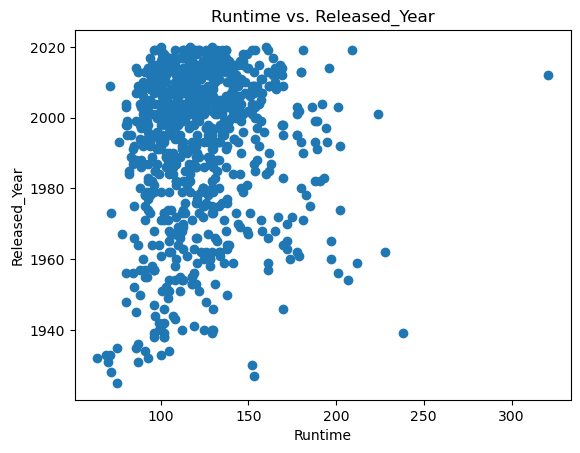

In [ ]:
plt.scatter(clean_df['Runtime'],clean_df['Released_Year'])
plt.title('Runtime vs. Released_Year')
plt.xlabel('Runtime')
plt.ylabel('Released_Year')

<Axes: >

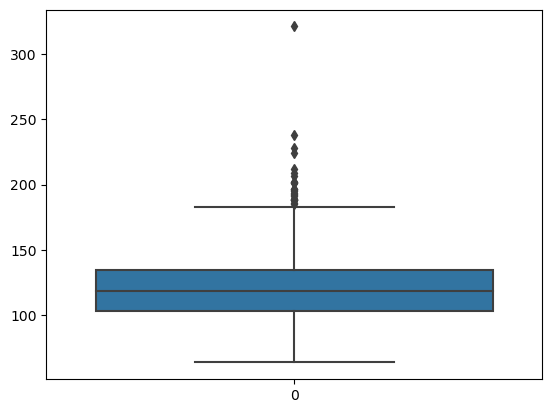

In [ ]:
sns.boxplot(clean_df["Runtime"])

<Axes: >

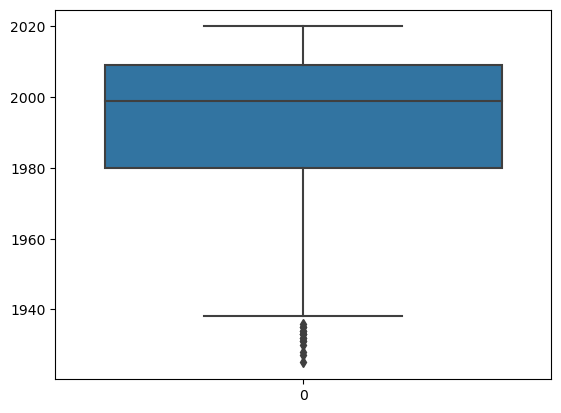

In [ ]:
sns.boxplot(clean_df["Released_Year"])

In [ ]:
import pandas as pd
print("Old Shape = ", clean_df.shape)
Q1 = clean_df['Runtime'].quantile(0.25)
Q3 = clean_df['Runtime'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(clean_df['Runtime']>=upper)[0]
lower_array = np.where(clean_df['Runtime']<=lower)[0]

outlierUP_df, clean_df = clean_df[clean_df['Runtime'] >= upper],clean_df[clean_df['Runtime'] < upper]
outlierLOW_df, clean_df = clean_df[clean_df['Runtime'] <=lower],clean_df[clean_df['Runtime'] > lower]

print("Upper Runtime Outliers =",upper_array)
print("Lower Runtime Outliers =",lower_array)
print("New Shape = ", clean_df.shape)

Old Shape =  (842, 3910)
Upper Runtime Outliers = [  3   5   7  24  30  99 111 157 186 207 211 214 224 233 279 286 301 311
 329 373 432 495 518 549 670 673 838]
Lower Runtime Outliers = []
New Shape =  (815, 3910)


In [ ]:
print("Old Shape = ", clean_df.shape)
Q1 = clean_df['Released_Year'].quantile(0.25)
Q3 = clean_df['Released_Year'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

upper_array = np.where(clean_df['Released_Year']>=upper)[0]
lower_array = np.where(clean_df['Released_Year']<=lower)[0]

outlierUP_df, clean_df = clean_df[clean_df['Released_Year'] >= upper],clean_df[clean_df['Released_Year'] < upper]
outlierLOW_df, clean_df = clean_df[clean_df['Released_Year'] <=lower],clean_df[clean_df['Released_Year'] > lower]

print("Upper Released_Year Outliers =",upper_array)
print("Lower Released_Year Outliers =",lower_array)
print("New Shape = ", clean_df.shape)

Old Shape =  (815, 3910)
Upper Released_Year Outliers = []
Lower Released_Year Outliers = [ 45  46 100 220 221 331 332 333 420 421 551 552 553 554 696 814]
New Shape =  (799, 3910)


In [ ]:
print("Percentage Rows Left = ", ((799/1000))*100, "%")
print("Percentage Rows Removed = ", (((1000-799)/1000))*100, "%")

Percentage Rows Left =  79.9 %
Percentage Rows Removed =  20.1 %


In removing the outliers, we have increased the percentage of removed data to 20.1% which is still below the limitation of 30%.

##Visualization of Data

Here are visualizations to compare with those before the data was cleaned.

###Single-variable Visualizations

<Axes: >

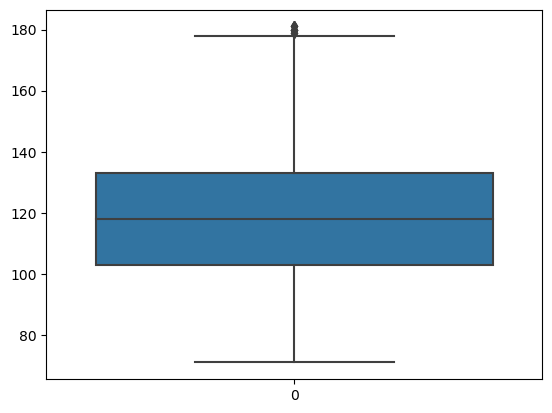

In [ ]:
sns.boxplot(clean_df["Runtime"])

<Axes: >

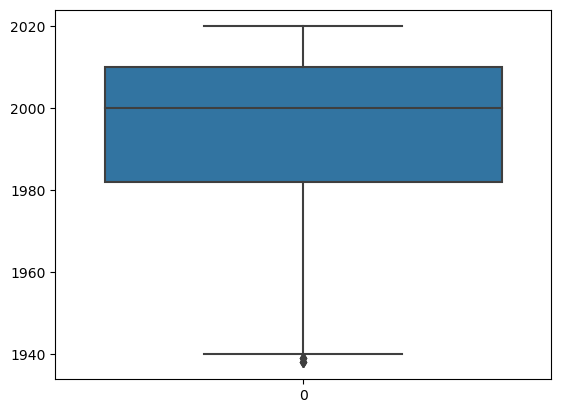

In [ ]:
sns.boxplot(clean_df["Released_Year"])

Note that there are far fewer outliers shown in the boxplots.

Here are some kernel density plots to see the distribution of the cleaned data.

<Axes: xlabel='Released_Year', ylabel='Density'>

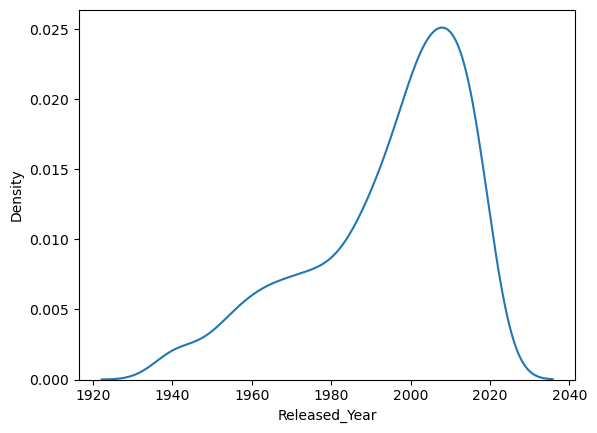

In [ ]:
sns.kdeplot(clean_df['Released_Year'])

<Axes: xlabel='IMDB_Rating', ylabel='Density'>

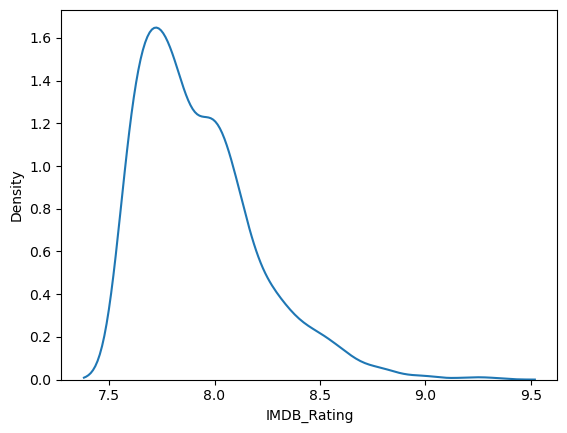

In [ ]:
sns.kdeplot(clean_df['IMDB_Rating'])

<Axes: xlabel='Runtime', ylabel='Density'>

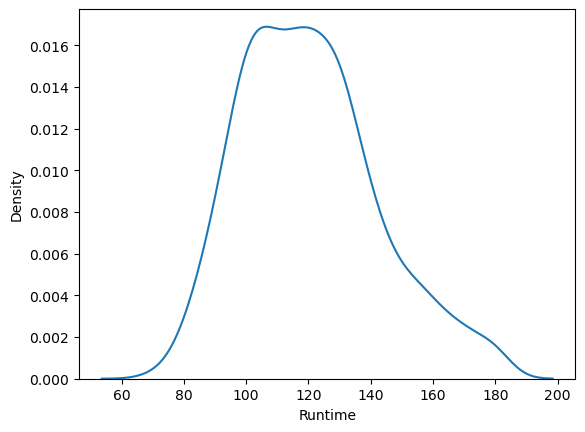

In [ ]:
sns.kdeplot(clean_df['Runtime'])

With the KDA plots, we can see that Release_Year indicates our data is left-skewed with the median being around the 2010.  Likewise with IMDB_Rating, there is a clear right-skew with the median being around 7.75.  Lastly, Runtime is relatively normal compared to Release_Year and IMDB_Rating, though it has some noticeable positive kurtosis with how steep the tails are.

###Bivariate Visualizations


Text(0, 0.5, 'Released_Year')

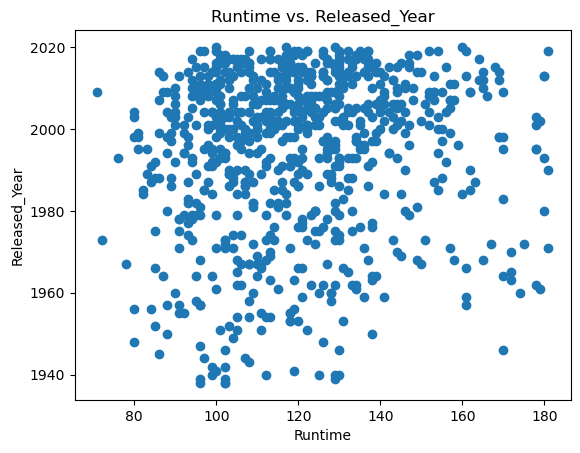

In [ ]:
plt.scatter(clean_df['Runtime'],clean_df['Released_Year'])
plt.title('Runtime vs. Released_Year')
plt.xlabel('Runtime')
plt.ylabel('Released_Year')

Notice the change in the scattering compared to the same plot before cleaning the data. Now there is slightly less clumping and more distinct distance between data points.

Text(0, 0.5, 'IMDB_Rating')

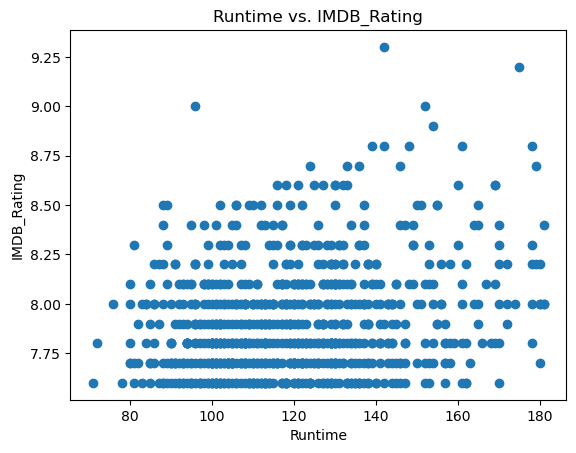

In [ ]:
plt.scatter(clean_df['Runtime'],clean_df['IMDB_Rating'])
plt.title('Runtime vs. IMDB_Rating')
plt.xlabel('Runtime')
plt.ylabel('IMDB_Rating')


Text(0, 0.5, 'IMDB_Rating')

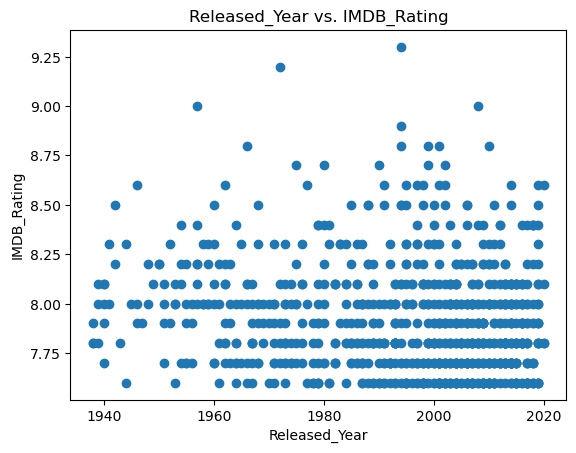

In [ ]:
plt.scatter(clean_df['Released_Year'],clean_df['IMDB_Rating'])
plt.title('Released_Year vs. IMDB_Rating')
plt.xlabel('Released_Year')
plt.ylabel('IMDB_Rating')

These last two scatter plots show scatter pattern of Runtime and Released_Year when it comes to IMDB_Rating.

<Axes: xlabel='Runtime', ylabel='IMDB_Rating'>

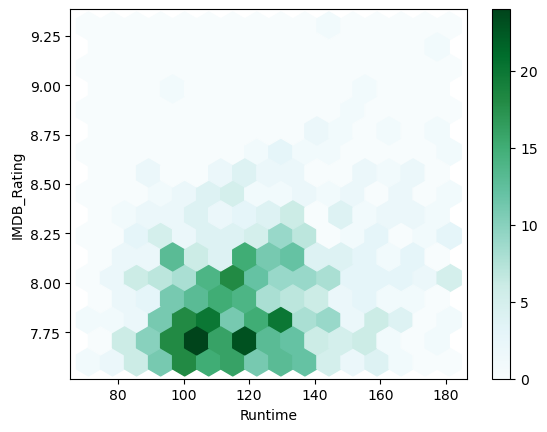

In [ ]:
clean_df.plot.hexbin(x='Runtime', y='IMDB_Rating', gridsize=15)

<Axes: xlabel='Released_Year', ylabel='IMDB_Rating'>

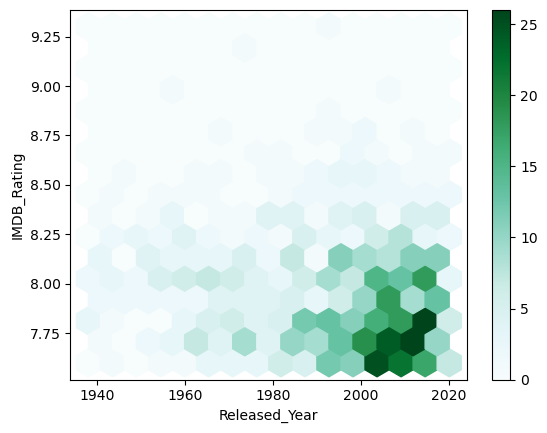

In [ ]:
clean_df.plot.hexbin(x='Released_Year', y='IMDB_Rating', gridsize=15)

These two hex plots are better than scatter plots at demonstrating where the density of data sits.

<Axes: xlabel='Adventure', ylabel='IMDB_Rating'>

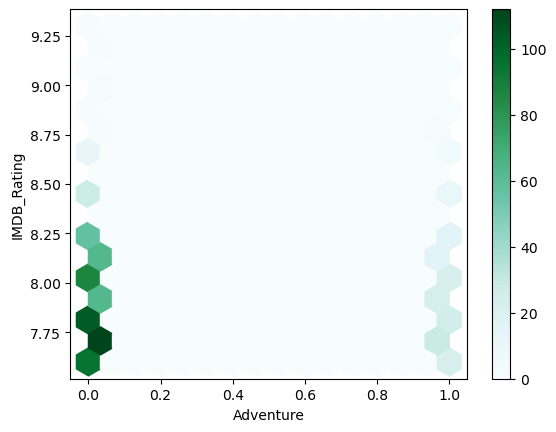

In [ ]:
clean_df.plot.hexbin(x='Adventure', y='IMDB_Rating', gridsize=15)

###Correlation Matrix

Though it may take long to run (around 30-60 seconds), the matrix shows the correlation between all variables in the cleaned dataset.

In [ ]:
matrix = clean_df.corr()
print(matrix)

C:\Users\josep\AppData\Local\Temp\ipykernel_21648\2181450319.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = clean_df.corr()


                           Released_Year   Runtime  IMDB_Rating  Meta_score  \
Released_Year                   1.000000  0.108317    -0.136460   -0.302338   
Runtime                         0.108317  1.000000     0.230939   -0.086161   
IMDB_Rating                    -0.136460  0.230939     1.000000    0.256636   
Meta_score                     -0.302338 -0.086161     0.256636    1.000000   
Action                          0.129238  0.098661    -0.010418   -0.166361   
...                                  ...       ...          ...         ...   
Zack Snyder Director            0.033422  0.043794    -0.058369   -0.095740   
Zaza Urushadze Director         0.033351 -0.053407     0.035041   -0.012983   
Zoya Akhtar Director            0.043968  0.054246     0.009612   -0.036003   
Çagan Irmak Director                 NaN       NaN          NaN         NaN   
Ömer Faruk Sorak Director            NaN       NaN          NaN         NaN   

                             Action  Adventure  Ani

In [ ]:
graph_corr = clean_df.corr().abs().stack()
filter_corr = graph_corr[((graph_corr >= .5) | (graph_corr <= -.5)) & (graph_corr !=1.000)].sort_values(ascending=False)

C:\Users\josep\AppData\Local\Temp\ipykernel_21648\2097963518.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  graph_corr = clean_df.corr().abs().stack()


In [ ]:
print('Top 20 Correlations from Clean Data')
filter_corr[:20]

Top 20 Correlations from Clean Data


Daniel Radcliffe Star 1    Rupert Grint Star 3          0.912296
Rupert Grint Star 3        Daniel Radcliffe Star 1      0.912296
Mark Hamill Star 1         Carrie Fisher Star 3         0.865481
Carrie Fisher Star 3       Mark Hamill Star 1           0.865481
Diane Keaton Star 2        Woody Allen Star 1           0.865481
Carrie Fisher Star 3       Harrison Ford Star 2         0.865481
Harrison Ford Star 2       Carrie Fisher Star 3         0.865481
Woody Allen Star 1         Diane Keaton Star 2          0.865481
Emma Watson Star 2         Rupert Grint Star 3          0.844089
Rupert Grint Star 3        Emma Watson Star 2           0.844089
Ingmar Bergman Director    Gunnar Björnstrand Star 4    0.815984
Gunnar Björnstrand Star 4  Ingmar Bergman Director      0.815984
Michael J. Fox Star 1      Christopher Lloyd Star 2     0.815984
Lea Thompson Star 3        Christopher Lloyd Star 2     0.815984
Christopher Lloyd Star 2   Michael J. Fox Star 1        0.815984
                         

In [ ]:
print(filter_corr.shape)

(4526,)


In [ ]:
graph_corr2 = abs(clean_df.corr()['IMDB_Rating'].sort_values(ascending=False))

C:\Users\josep\AppData\Local\Temp\ipykernel_21648\2568212072.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  graph_corr2 = abs(clean_df.corr()['IMDB_Rating'].sort_values(ascending=False))


In [ ]:
graph_corr2

IMDB_Rating                   1.000000
Meta_score                    0.256636
Runtime                       0.230939
Christopher Nolan Director    0.194368
Morgan Freeman Star 2         0.174903
                                ...   
Yasujirô Ozu Director              NaN
Yavuz Turgul Director              NaN
Yilmaz Erdogan Director            NaN
Çagan Irmak Director               NaN
Ömer Faruk Sorak Director          NaN
Name: IMDB_Rating, Length: 3902, dtype: float64

#Data Modeling Techniques

##Regression Analysis



In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
df_reg = clean_df.copy()
df_reg=df_reg.drop(['Series_Title','Overview'],axis=1)

df_reg["Genre"] = df_reg["Genre"].astype('category')
df_reg["Genre"] = df_reg["Genre"].cat.codes
df_reg["Director"] = df_reg["Director"].astype('category')
df_reg["Director"] = df_reg["Director"].cat.codes
df_reg["Star1"] = df_reg["Star1"].astype('category')
df_reg["Star1"] = df_reg["Star1"].cat.codes
df_reg["Star2"] = df_reg["Star2"].astype('category')
df_reg["Star2"] = df_reg["Star2"].cat.codes
df_reg["Star3"] = df_reg["Star3"].astype('category')
df_reg["Star3"] = df_reg["Star3"].cat.codes
df_reg["Star4"] = df_reg["Star4"].astype('category')
df_reg["Star4"] = df_reg["Star4"].cat.codes
df_reg.dtypes

Released_Year                  int32
Runtime                        int32
Genre                          int16
IMDB_Rating                  float64
Meta_score                     int32
                              ...   
Zack Snyder Director           int64
Zaza Urushadze Director        int64
Zoya Akhtar Director           int64
Çagan Irmak Director           int64
Ömer Faruk Sorak Director      int64
Length: 3908, dtype: object

In [ ]:
y = df_reg.iloc[:,3].values
x = df_reg.iloc[:,0:3].values
x1 = df_reg.iloc[:,4:].values
x = np.concatenate((x, x1),1)

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .25, random_state = 0)

In [ ]:
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)
xtest = sc.transform(xtest)

###Linear Regression

In [99]:
regressor = LinearRegression()
regressor.fit(xtrain,ytrain)
predscore = regressor.predict(xtest)

def SSE(given, predicted):
    n=len(given)
    SSE=((np.asarray(given)-np.asarray(predicted))**2)/float(2*n)
    return sum(SSE)

def MSE(given, predicted):
    n=len(given)
    MSE=((np.asarray(given)-np.asarray(predicted))**2)/n
    return sum(MSE)

In [100]:
print("Sum of Squares Error:",SSE(ytest,predscore))
print("Error Mean Sum of Squares: ", MSE(ytest,predscore))
print(metrics.r2_score(ytest, predscore))

Sum of Squares Error: 0.043677576651685306
Error Mean Sum of Squares:  0.08735515330337061
-0.02349629967715905


*   Cose because model type is Simple, powerful and direct. Easy to setup. Give useful and insightful information. In this case given, the extremely low SSE and MSE prove that the model gives accurate predications on this data set.

*   There are no hyper parameter to tune. We used sum of squares error (SSE) and Error Mean Sum of Squares (MSE) to measure error rate of the model to validate performance.


*   Given that SSE and MSE were less than .1 the model peformed well test data, and this model is a viable choice for the final model of the project.


*  Provide evaluation metrics for this model are SSE and MSE.

### Joe MLP Classifier

In [97]:
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
model = MLPRegressor()
model.fit(xtrain, ytrain)
predscore = model.predict(xtest)

print(metrics.r2_score(ytest, predscore))

print("Sum of Squares Error:",SSE(ytest,predscore))
print("Error Mean Sum of Squares: ", MSE(ytest,predscore))

-74.76215738052002
Sum of Squares Error: 3.2331405959440214
Error Mean Sum of Squares:  6.466281191888043


*   Describe the rationale behind choosing that particular method
*   Detail the process of tuning parameters and validating the model's performance
*   Interpret the results and draw conclusions about their efficacy for your project
*  Provide evaluation metrics (based on the data and model used, e.g. F1, recall, precision, MSE, RMSE etc


###Alex MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
X = df_reg.drop('IMDB_Rating', axis=1)
y = df_reg['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#section below creates which of the columns will be used as cat and num features
columns = X_train.columns.values

types = np.array([z for z in X_train.dtypes])

#This creates an array of the numerical features that also are not objects.
numerical = types != 'object'

num_features = columns[numerical].tolist()
cat_features = columns[~numerical].tolist()

# print(f"numerical_features are  : {num_features}") #this will show cat and num features
# print(f"categorical_features are: {cat_features}")

features = num_features + cat_features

#num pipeline filled with imputer median, though this is redundant if you have no missing values
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#cat pipeline filled values with none constant
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value= "None")),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

#putting all cat and num together in this pipeline
data_pipeline = ColumnTransformer( transformers= [
        # (name, transformer,     columns)
        ("num_pipeline", num_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features)    ],
         remainder='drop',
         n_jobs=-1
    )

#fitting train and valid set
data_pipeline.fit(X_train[features])
data_pipeline.fit(X_valid[features])

#transforming the X train, valid, and test sets.
X_train_transformed = data_pipeline.transform(X_train[features])
X_valid_transformed = data_pipeline.transform(X_valid[features])
X_test_transformed = data_pipeline.transform(X_test[features])


number_of_inputs = X_train_transformed.shape[1]

print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)

NameError: name 'Pipeline' is not defined

In [ ]:
%%time
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("mlp", MLPRegressor())
    ])

model = full_pipeline_with_predictor.fit(X_train, y_train)

#first_layer_neurons= np.arange(10, 200, 10).tolist()
#second_layer_neurons= np.arange(10, 200, 10).tolist()
#hidden_layer_sizes = [first_layer_neurons,second_layer_neurons]

parameters = {
    'mlp__alpha': (10, 1, 0.1, 0.01, 0.001),
    #'mlp__hidden_layer_sizes': [[200,50,1],[300,100,1]],
    #'mlp__activation': ['identity', 'tanh', 'relu'],
    #'mlp__solver': ['lbfgs', 'sgd', 'adam'],
    #'mlp__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'mlp__learning_rate': ['adaptive'],
    #'mlp__learning_rate_init': (0.1, 0.01, 0.001),
}

grid_search = GridSearchCV(full_pipeline_with_predictor, parameters, cv=3, n_jobs=-1, verbose=1, )
grid_search.fit(X_train,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), #Use the "median" to impute missing vlaues
        ('std_scaler', StandardScaler()),
        ('perceptron', MLPClassifier(random_state=42))
    ])

pipeline.fit(X_train,y_train)
#preds = pipeline.predict(X_test)

parameters = {
    'perceptron__alpha': (10, 1, 0.1, 0.01, 0.001),
    'perceptron__solver': ['lbfgs', 'sgd', 'adam'],
    'perceptron__learning_rate': ['constant', 'invscaling', 'adaptive'],
    'perceptron__learning_rate_init': (0.1, 0.01, 0.001),
}


grid_search = GridSearchCV(pipeline, parameters, cv=3, n_jobs=-1, verbose=1, )
grid_search.fit(x,y)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

preds = grid_search.predict(x)
accuracy = accuracy_score(preds, y)

results = pd.DataFrame(columns=["Model", "Test Accuracy"])
results.loc[len(results)] = ["Perceptron", np.round(accuracy, 3)]
results

ValueError: ignored

In [ ]:
model = MLPClassifier()
model.fit(xtrain.astype(int), ytrain.astype(int))
predscore = model.predict(xtest.astype(int))

print("Sum of Squares Error:",SSE(ytest.astype(int),predscore))
print("Error Mean Sum of Squares: ", MSE(ytest.astype(int),predscore))

*   Describe the rationale behind choosing that particular method
*   Detail the process of tuning parameters and validating the model's performance
*   Interpret the results and draw conclusions about their efficacy for your project
*  Provide evaluation metrics (based on the data and model used, e.g. F1, recall, precision, MSE, RMSE etc

###Emily MLP Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV

model3 = MLPClassifier()
model3.fit(xtrain.astype(int), ytrain.astype(int))


np.random.seed(42)

MLPmodel = model3.fit(xtrain.astype(int), ytrain.astype(int))

params = {'activation': ['identity', 'logistic', 'tanh', 'relu'],
          'max_iter': range(200, 500),
          'solver': ['lbfgs', 'sgd', 'adam'],
          'learning_rate': ['constant', 'invscaling', 'adaptive']
}

gscv = GridSearchCV(MLPmodel, params, verbose=1)

gscv.fit(np.array(xtrain.astype(int)), np.array(ytrain.astype(int)))
print(gscv.best_params_)

predicted_values = gscv.predict(xtest.astype(int))

from sklearn.metrics import accuracy_score
score = accuracy_score(ytest.astype(int),predicted_values)

print(score)

Fitting 5 folds for each of 10800 candidates, totalling 54000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


##Dimensionality Reduction (PCA)

###Pipeline PCA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
from sklearn.decomposition import PCA
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
from random import randint
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

In [ ]:
%%time
X = clean_df.drop('IMDB_Rating', axis=1)
y = clean_df['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#section below creates which of the columns will be used as cat and num features
columns = X_train.columns.values

types = np.array([z for z in X_train.dtypes])

#This creates an array of the numerical features that also are not objects.
numerical = types != 'object'

num_features = columns[numerical].tolist()
cat_features = columns[~numerical].tolist()

# print(f"numerical_features are  : {num_features}") #this will show cat and num features
# print(f"categorical_features are: {cat_features}")

features = num_features + cat_features

#num pipeline filled with imputer median, though this is redundant if you have no missing values
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#cat pipeline filled values with none constant
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value= "None")),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

#putting all cat and num together in this pipeline
data_pipeline = ColumnTransformer( transformers= [
        # (name, transformer,     columns)
        ("num_pipeline", num_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features)    ],
         remainder='drop',
         n_jobs=-1
    )

#fitting train and valid set
data_pipeline.fit(X_train[features])
data_pipeline.fit(X_valid[features])

#transforming the X train, valid, and test sets.
X_train_transformed = data_pipeline.transform(X_train[features])
X_valid_transformed = data_pipeline.transform(X_valid[features])
X_test_transformed = data_pipeline.transform(X_test[features])


number_of_inputs = X_train_transformed.shape[1]

print("X_train Shape: ", X_train.shape)

X_train Shape:  (679, 3909)
CPU times: user 384 ms, sys: 159 ms, total: 543 ms
Wall time: 4.71 s


####Three Parameters Tuning Version

In [ ]:
%%time
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("PCA", PCA(
            ))
    ])

PCAmodel = full_pipeline_with_predictor.fit(X_train, y_train)

parameters = {"PCA__n_components": range(1,3),
             #"PCA__iterated_power": range(1,3),
             "PCA__svd_solver": ['auto', 'full', 'arpack', 'randomized'],
             "PCA__power_iteration_normalizer": ['auto', 'QR', 'LU', 'none']
              }

grid_search = GridSearchCV(full_pipeline_with_predictor, parameters, cv=3, n_jobs=-1, verbose=1, )
grid_search.fit(X_train,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best score: -11360.119
Best parameters set:
	PCA__n_components: 2
	PCA__power_iteration_normalizer: 'auto'
	PCA__svd_solver: 'full'
CPU times: user 16.8 s, sys: 2.85 s, total: 19.7 s
Wall time: 15min 44s


In [ ]:
%%time
np.random.seed(42)
decision = Pipeline([
        ("dataprep", data_pipeline),
        ("model", PCA(
            n_components = 2,
            power_iteration_normalizer = 'auto',
            svd_solver = 'full'
            ))
    ])
model = decision.fit(X_train, y_train)
#y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
#mse = mean_squared_error(y_test, y_pred)
#print("Tuned ElasticNet l1 ratio: {}".format(model.best_params_))
print("Tuned R squared: {}".format(r2))
#print("Tuned MSE: {}".format(mse))
print('Variance of each component:', model['model'].explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(model['model'].explained_variance_ratio_))*100, 2))

Tuned R squared: -13260.700497599459
Variance of each component: [0.00263123 0.00244201]

 Total Variance Explained: 0.51
CPU times: user 23.7 s, sys: 1.42 s, total: 25.1 s
Wall time: 16.6 s


- Describe the rationale behind choosing that particular method
  - We used this method to see if there were any significant components we could focus on, which would help us to remove the insignificant components from the model.
- Detail the process of tuning parameters and validating the model's performance
  - In preparation for to run a GridSearch on the PCA model, we chose to look at the n_components, svd_solver, and power_iteration_normalizer hyperparameters.  We chose n_components to determine the most optimal number of components to explain the variance.  We added svd_solver and power_iteration_normalizer to test various methods of dimensionality reduction and to potentially increase their efficiency in the process.
- Interpret the results and draw conclusions about their efficacy for your project
  - This model, with its two components, were at best only able to explain 0.51% of the variance, which is so incredibly low that it indicates that either the model has an error in it or the data is not conducive to this dataset.
- Provide evaluation metrics (based on the data and model used, e.g. F1, recall, precision, MSE, RMSE etc)
  - Explained Variance Ratio is 0.00263 and 0.00244, for a combined value of 0.00507

####Five Parameters Tuning Version


In [ ]:
%%time
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("PCA", PCA(
            ))
    ])

PCAmodel = full_pipeline_with_predictor.fit(X_train, y_train)

parameters = {"PCA__n_components": range(1,3),
              "PCA__n_oversamples": range(1,3),
              "PCA__random_state": range(1,3),
              "PCA__svd_solver": ['auto', 'full', 'arpack', 'randomized'],
              "PCA__power_iteration_normalizer": ['auto', 'QR', 'LU', 'none']}

grid_search = GridSearchCV(full_pipeline_with_predictor, parameters, cv=3, n_jobs=-1, verbose=1, )
grid_search.fit(X_train,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 3 folds for each of 128 candidates, totalling 384 fits


KeyboardInterrupt: ignored

In [ ]:
%%time
np.random.seed(42)
decision = Pipeline([
        ("dataprep", data_pipeline),
        ("model", PCA(
            n_components = 2,
            n_oversamples = 1,
            power_iteration_normalizer = 'auto',
            random_state = 1,
            svd_solver = 'full'
            ))
    ])
model = decision.fit(X_train, y_train)
#y_pred = model.predict(X_test)
r2 = model.score(X_test, y_test)
#mse = mean_squared_error(y_test, y_pred)
#print("Tuned ElasticNet l1 ratio: {}".format(model.best_params_))
print("Tuned R squared: {}".format(r2))
#print("Tuned MSE: {}".format(mse))
print('Variance of each component:', model['model'].explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(model['model'].explained_variance_ratio_))*100, 2))

KeyboardInterrupt: ignored

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter('model',c=train['IMDB_Rating'],cmap='plasma')
plt.xlabel(X_test)
plt.ylabel(y_test)

NameError: ignored

<Figure size 1000x1000 with 0 Axes>

###No Pipline PCA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

train, test = clean_df.select_dtypes([np.number])[:399], clean_df.select_dtypes([np.number])[400:]

scaling=StandardScaler()

scaling.fit(train)
Scaled_data=scaling.transform(train)

principal=PCA(n_components=3)
principal.fit(train)
x=principal.transform(train)

print(x.shape)

(399, 3)


In [ ]:
principal.components_

array([[ 4.04209697e-01,  9.01879382e-01,  1.54368215e-03, ...,
         1.79715466e-04,  0.00000000e+00,  0.00000000e+00],
       [-8.88173031e-01,  4.26740265e-01,  2.17389244e-03, ...,
        -7.61507734e-05,  0.00000000e+00,  0.00000000e+00],
       [-2.18333922e-01, -6.63461092e-02, -2.12512514e-03, ...,
         1.64740090e-04, -0.00000000e+00, -0.00000000e+00]])

####PCA Train Data

Text(0, 0.5, 'pc2')

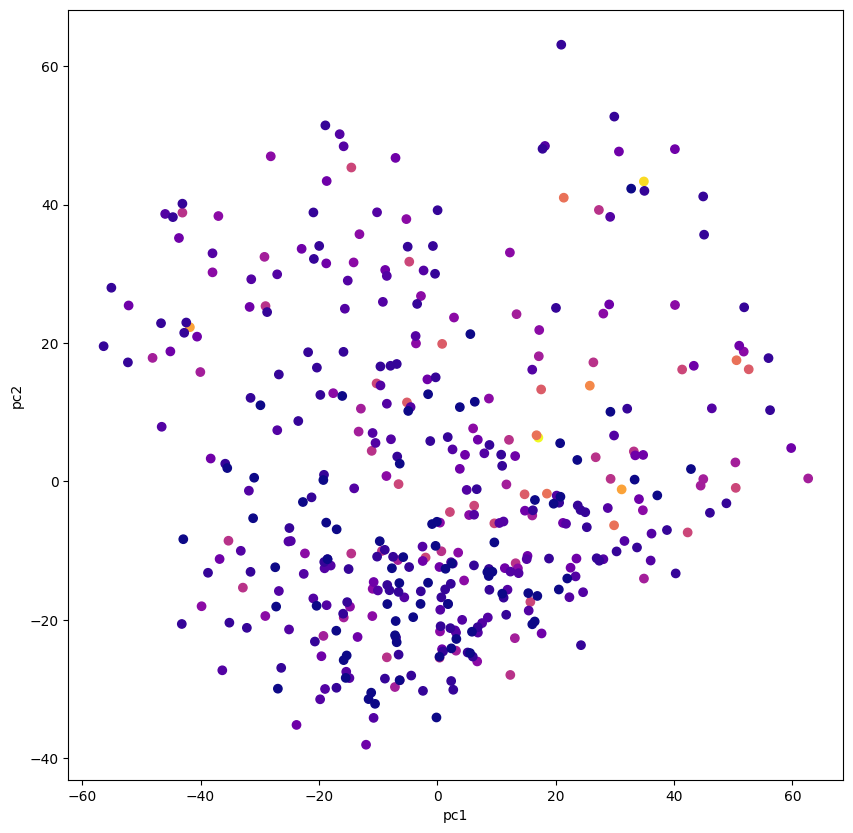

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=train['IMDB_Rating'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

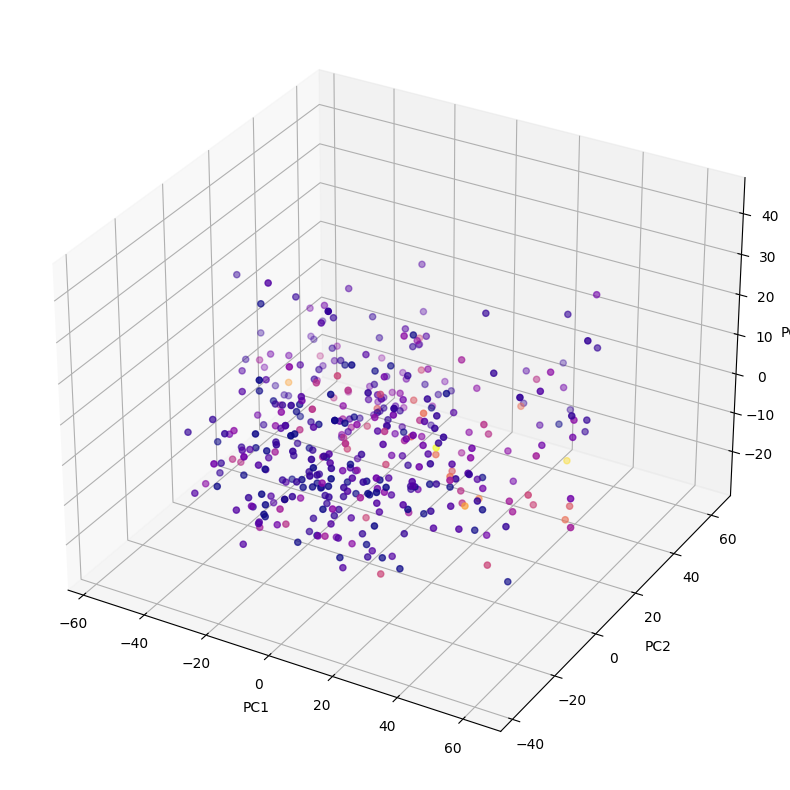

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

axis.scatter(x[:,0],x[:,1],x[:,2], c=train['IMDB_Rating'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [ ]:
train_var_ratio=principal.explained_variance_ratio_
print(train_var_ratio)

[0.50274902 0.39201188 0.09927861]


#### PCA Test Data

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=test['IMDB_Rating'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

axis.scatter(x[:,0],x[:,1],x[:,2], c=test['IMDB_Rating'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [ ]:
test_var_ratio=principal.explained_variance_ratio_
print(test_var_ratio)

In [ ]:
print("Difference in PCA variance for model is",(train_var_ratio-test_var_ratio))

####All Data

In [ ]:
scaling=StandardScaler()

scaling.fit(clean_df.select_dtypes([np.number]))
Scaled_data=scaling.transform(clean_df.select_dtypes([np.number]))

principal=PCA(n_components=3)
principal.fit(clean_df.select_dtypes([np.number]))
x=principal.transform(clean_df.select_dtypes([np.number]))

print(x.shape)

(799, 3)


In [ ]:
principal.components_

array([[ 4.62297458e-01,  8.73753133e-01,  1.46481337e-03, ...,
         1.04245084e-04, -0.00000000e+00, -0.00000000e+00],
       [-8.47349833e-01,  4.85425877e-01,  3.88269758e-03, ...,
        -2.34976344e-05, -0.00000000e+00, -0.00000000e+00],
       [-2.61181931e-01, -2.83474503e-02, -5.28735725e-03, ...,
         4.43021284e-05, -0.00000000e+00, -0.00000000e+00]])

Text(0, 0.5, 'pc2')

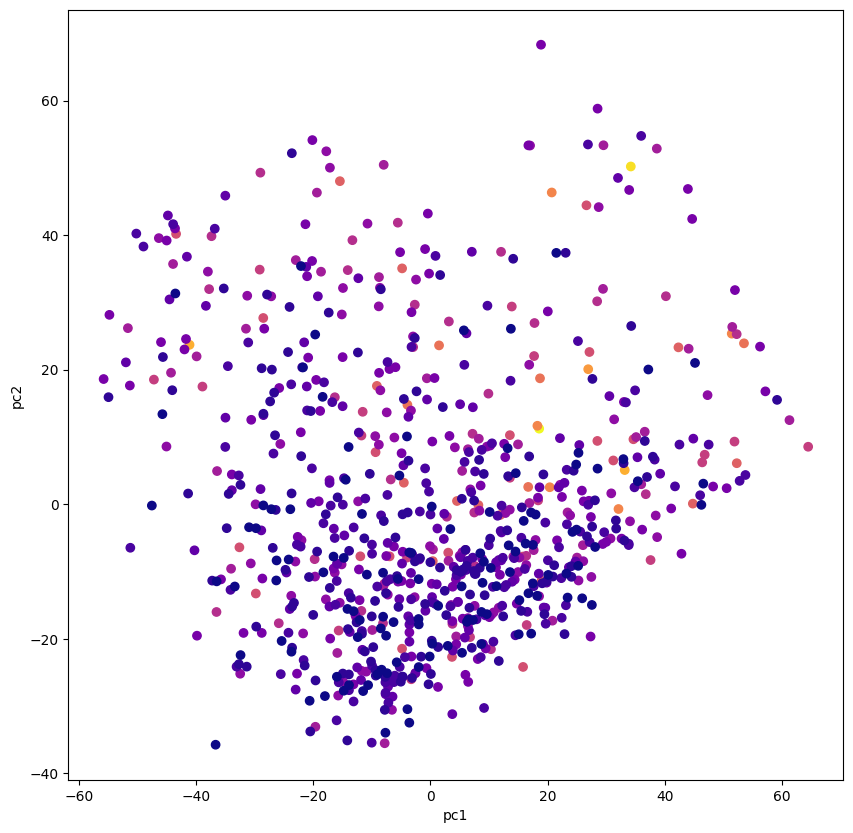

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x[:,0],x[:,1],c=clean_df['IMDB_Rating'],cmap='plasma')
plt.xlabel('pc1')
plt.ylabel('pc2')

Text(0.5, 0, 'PC3')

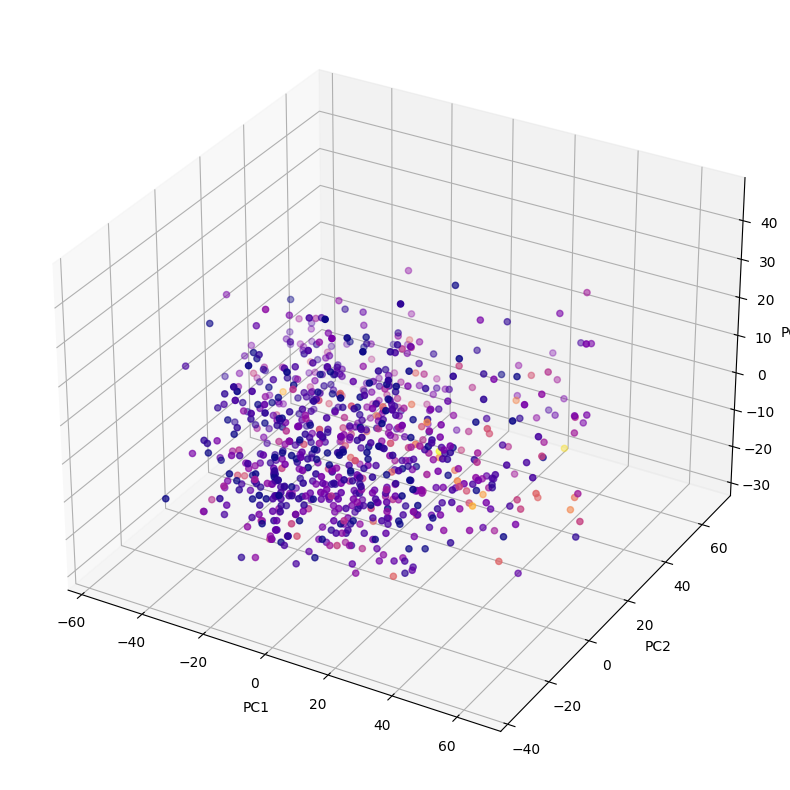

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

axis = fig.add_subplot(111, projection='3d')

axis.scatter(x[:,0],x[:,1],x[:,2], c=clean_df['IMDB_Rating'],cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

In [ ]:
all_var_ratio=principal.explained_variance_ratio_
print(all_var_ratio)

[0.49314317 0.37533661 0.12505495]


In [ ]:
print("Difference in PCA variance between All and model is",(all_var_ratio-train_var_ratio))

NameError: ignored

*   Describe the rationale behind choosing that particular method
*   Detail the process of tuning parameters and validating the model's performance
*   Interpret the results and draw conclusions about their efficacy for your project
*  Provide evaluation metrics (based on the data and model used, e.g. F1, recall, precision, MSE, RMSE etc


##Classification (Decision Tree)

### Pipeline Decision Tree

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
from random import randint
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

In [ ]:
X = clean_df.drop('IMDB_Rating', axis=1)
y = clean_df['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

#section below creates which of the columns will be used as cat and num features
columns = X_train.columns.values

types = np.array([z for z in X_train.dtypes])

#This creates an array of the numerical features that also are not objects.
numerical = types != 'object'

num_features = columns[numerical].tolist()
cat_features = columns[~numerical].tolist()

# print(f"numerical_features are  : {num_features}") #this will show cat and num features
# print(f"categorical_features are: {cat_features}")

features = num_features + cat_features

#num pipeline filled with imputer median, though this is redundant if you have no missing values
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

#cat pipeline filled values with none constant
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value= "None")),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

#putting all cat and num together in this pipeline
data_pipeline = ColumnTransformer( transformers= [
        # (name, transformer,     columns)
        ("num_pipeline", num_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features)    ],
         remainder='drop',
         n_jobs=-1
    )

#fitting train and valid set
data_pipeline.fit(X_train[features])
data_pipeline.fit(X_valid[features])

#transforming the X train, valid, and test sets.
X_train_transformed = data_pipeline.transform(X_train[features])
X_valid_transformed = data_pipeline.transform(X_valid[features])
X_test_transformed = data_pipeline.transform(X_test[features])


number_of_inputs = X_train_transformed.shape[1]

print("X_train Shape: ", X_train.shape)

X_train Shape:  (679, 3909)


In [ ]:
%%time
np.random.seed(42)
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),
        ("dtr", DecisionTreeRegressor(
            ))
    ])

DTmodel = full_pipeline_with_predictor.fit(X_train, y_train)

parameters = {"dtr__max_depth": range(1,10),
              "dtr__max_features": range(1,10),
              "dtr__min_samples_leaf": range(1,10),
              "dtr__criterion": ['squared_error', 'poisson', 'absolute_error']}

grid_search = GridSearchCV(full_pipeline_with_predictor, parameters, cv=4, n_jobs=-1, verbose=1, )
grid_search.fit(X_train,y_train)

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 4 folds for each of 2187 candidates, totalling 8748 fits


KeyboardInterrupt: ignored

With our results from doing a GridSearch to find the most optimal hypterparameters, we can see the most optimal parameters are:
- criterion = squared_error
- max_depth = 2
- max_features = 9
- min_samples_leaf = 3

Now, we'll plug those into the model and analyze its accuracy scores, specifically Mean Squared Error and R-Squared scores.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
X = clean_df.drop('IMDB_Rating', axis=1)
y = clean_df['IMDB_Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train_valid, X_valid, y_train_valid, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
#section below creates which of the columns will be used as cat and num features
columns = X_train.columns.values

types = np.array([z for z in X_train.dtypes])

#This creates an array of the numerical features that also are not objects.
numerical = types != 'object'

num_features = columns[numerical].tolist()
cat_features = columns[~numerical].tolist()
# print(f"numerical_features are  : {num_features}") #this will show cat and num features
# print(f"categorical_features are: {cat_features}")

features = num_features + cat_features

#num pipeline filled with imputer mean
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('std_scaler', StandardScaler()),
    ])

#cat pipeline filled values with none constant
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value= "None")),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

#putting all cat and num together in this pipeline
data_pipeline = ColumnTransformer( transformers= [
        # (name, transformer,     columns)
        ("num_pipeline", num_pipeline, num_features),
        ("cat_pipeline", cat_pipeline, cat_features)    ],
         remainder='drop',
         n_jobs=-1
    )

#fitting train and valid set
data_pipeline.fit(X_train[features])
data_pipeline.fit(X_valid[features])

ColumnTransformer(n_jobs=-1,
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Released_Year', 'Runtime', 'Meta_score',
                                  'Action', 'Adventure', 'Animation',
                                  'Biography', 'Comedy', 'Crime', 'Drama',
                                  'Family', 'Fantasy', 'Film-Noir', 'History',
                                  'Horror', 'Music', 'Musical', 'Mystery',
                                  'Romance', 'Sci-Fi', 'Sport'...
                                  'War', 'Western', 'Aamir Khan Star 1',
                                  'Aaron Taylor-Johnson Star 1',
                                  'Abhay Deol Star 1', 'Abraham Attah Star 1',
                                  'Adam Driver Star 1', 'Adrian Molina Star 1', ...]),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='None',
                                                                strategy='constant')),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Series_Title', 'Genre', 'Overview',
                                  'Director', 'Star1', 'Star2', 'Star3',
                                  'Star4'])])

In [ ]:
np.random.seed(42)
decision = Pipeline([
        ("dataprep", data_pipeline),
        ("DT", tree.DecisionTreeRegressor(
            criterion = 'squared_error',
            max_depth = 2,
            max_features = 9,
            min_samples_leaf = 3
            ))
    ])
DTmodel = decision.fit(X_train, y_train)

y_pred = DTmodel.predict(X_test)
r2 = DTmodel.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
#print("Tuned ElasticNet l1 ratio: {}".format(DTmodel.best_params_))
print("Tuned R squared: {}".format(r2))
print("Tuned MSE: {}".format(mse))

Tuned R squared: -9.884819044270188e-05
Tuned MSE: 0.07162930194928442


- Describe the rationale behind choosing that particular method
  - Our rationale for choosing a Decision Tree Regression model was for dimensionality reduction purposes and try to find the most optimal features in our dataset.
- Detail the process of tuning parameters and validating the model's performance
  - Using GridSearch, we tested various hyperparameters including criterion, max_depth, max_features, and min_samples_leaf.  After this, the GridSearch determined the most optimal parameters were
    - Criterion: squared_error
    - max_depth: 2
    - max_feautres: 9
    - min_samples_leaf: 3
- Interpret the results and draw conclusions about their efficacy for your project
  - First, let's look at the MSE.  This extremely low value indicates that our model is actually pretty accurate at predicting the target variable compared to their actual values.  However, the R-squared value indicates that this model is the wrong choice for our data, because not only is the R-squared value near zero (which indicates this model does not explain any of the variability in the data), but it is also negative, which means a flat horizontal line would do a better job at explaining the variability of our data than our model would.
- Provide evaluation metrics (based on the data and model used, e.g. F1, recall, precision, MSE, RMSE etc)
  - MSE = 0.071629
  - R-Squared = -0.000009885

### No Pipeline Decision Tree

In [ ]:
var_train, var_test, res_train, res_test = train_test_split(clean_df.select_dtypes([np.number]).drop(['IMDB_Rating'],axis=1), clean_df['IMDB_Rating'], test_size = .4)

In [ ]:
tree_reg = DecisionTreeRegressor(criterion = 'squared_error',max_depth=2)
tree_reg.fit(var_train, res_train)

In [ ]:
export_graphviz(tree_reg, out_file="IMDB_Rating_tree.dot",  class_names=res_test, rounded=True,filled=True)
with open("IMDB_Rating_tree.dot") as f: dot_graph = f.read()
Source(dot_graph)

*   We chose the decision tree method which is a classification technique becuase our project aims to categorize the IMDB data points into predefined classes so as to predict movie ratings.
*   For this model, we chose to try all numeric variables excluding the dependent variable, IMDB_Rating. We validated the model by training with 40% of the data and then testing with the remaining 60% of data.
*   The results of the decision tree show that this regrssion model has a low error rate for the lowest and the top scores but higher error rate for the middle ratings. As all squared error rates are below 0.5, it appears that this model does a good job in predicting the buckets when using the test data.
* The evaluation metrics for this model is squared_error which for this model ranges between 0 and 0.15 depending on the score. As such this model appears to be a good contender for the final implementation.   



##Time Series Analysis

In [ ]:
!pip install tsfresh

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.3/95.3 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.1/169.1 kB 8.5 MB/s eta 0:00:00


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from tsfresh.examples import load_robot_execution_failures
from tsfresh.transformers import RelevantFeatureAugmenter
import pandas as pd
import tsfresh


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import os
import zipfile
from sklearn.base import BaseEstimator, TransformerMixin
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer, make_column_transformer
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import warnings
from random import randint
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error

In [ ]:
sub_clean_df = clean_df[['IMDB_Rating','Released_Year']]

In [ ]:
sub_clean_df['Released_Year'] = sub_clean_df['Released_Year'].astype(str).astype('datetime64')

<ipython-input-91-30cc17cb557c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_clean_df['Released_Year'] = sub_clean_df['Released_Year'].astype(str).astype('datetime64')


In [ ]:
sub_clean_df = sub_clean_df.sort_values("Released_Year", ascending=True)

In [ ]:
sub_clean_df = sub_clean_df.set_index('Released_Year')

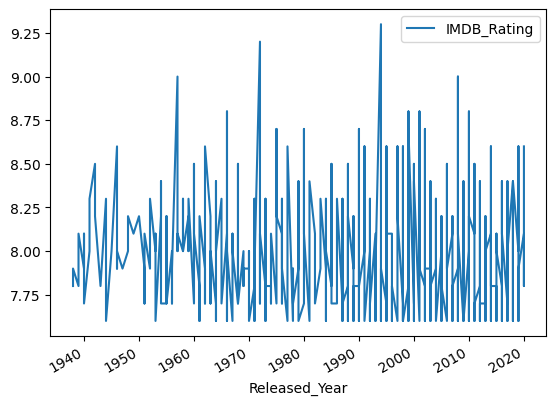

In [ ]:
sub_clean_df.plot()
plt.show()

In [ ]:
print(sub_clean_df.describe())

       IMDB_Rating
count   799.000000
mean      7.924406
std       0.278589
min       7.600000
25%       7.700000
50%       7.900000
75%       8.100000
max       9.300000


In [ ]:
sub_clean_df.head()

,IMDB_Rating
Released_Year,
1938-01-01,7.8
1938-01-01,7.8
1938-01-01,7.9
1939-01-01,7.8
1939-01-01,8.0


In [ ]:
print(sub_clean_df["IMDB_Rating"])

Released_Year
1938-01-01    7.8
1938-01-01    7.8
1938-01-01    7.9
1939-01-01    7.8
1939-01-01    8.0
             ... 
2019-01-01    7.9
2020-01-01    8.1
2020-01-01    7.8
2020-01-01    7.8
2020-01-01    8.6
Name: IMDB_Rating, Length: 799, dtype: float64


Dud

*   Describe the rationale behind choosing that particular method
*   Detail the process of tuning parameters and validating the model's performance
*   Interpret the results and draw conclusions about their efficacy for your project
*  Provide evaluation metrics (based on the data and model used, e.g. F1, recall, precision, MSE, RMSE etc

#Team Contribution Statement

##Emily Bartman

My contribution during the Data Science tasks (Part 2) was meeting coordination and attendance, creating a seperate notebook for this submission, drafting the EDA section, drafting the Decision Tree model section, Dimensionality Reduction (PCA, CA) model section, and ....

##Alex Schmig

My contribution during the Data Science tasks (Part 2) was ...

##Joseph Shepherd

My contribution during the Data Science tasks (Part 2) was ...